In [1]:
import pandas as pd
import json
import re

In [2]:
df = pd.read_csv('../../data/BTW17_Suggestions/BTW_COMPLETE/suggestions_20210719.csv')
df.head()

,id,queryterm,date,client,lang,url,raw_data
0,1,Jan van Aken,2017-02-13 17:13:45,chrome,de,http://clients1.google.de/complete/search,"[""Jan van Aken"",[""jan van aken privat"",""http:/..."
1,2,Jan van Aken,2017-02-13 17:13:46,chrome,de,http://suggestqueries.google.com/complete/search,"[""Jan van Aken"",[""jan van aken privat"",""jan va..."
2,3,Jan van Aken,2017-02-13 17:13:46,firefox,de,http://clients1.google.de/complete/search,"[""Jan van Aken"",[""jan van aken"",""jan van aken ..."
3,4,Jan van Aken,2017-02-13 17:13:46,firefox,de,http://suggestqueries.google.com/complete/search,"[""Jan van Aken"",[""jan van aken"",""jan van aken ..."
4,5,Jan van Aken,2017-02-13 17:13:46,serp,de,http://clients1.google.de/complete/search,"[""Jan van Aken"",[""jan van aken"",""jan van aken ..."


In [3]:
df.rename(columns={'date':'datetime'}, inplace=True)
df['date'] = df['datetime'].apply(lambda x: x.split(' ')[0])

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,928496.0,NaN,NaN,NaN,464409.379134,268045.663412,1.0,232292.75,464416.5,696540.25,928664.0
queryterm,928496,805,Cemile Giousouf,3432,NaN,NaN,NaN,NaN,NaN,NaN,NaN
datetime,928496,496340,2017-02-13 17:15:57,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
client,928496,4,opera,232125,NaN,NaN,NaN,NaN,NaN,NaN,NaN
lang,928496,2,de,916442,NaN,NaN,NaN,NaN,NaN,NaN,NaN
url,928496,2,http://clients1.google.de/complete/search,464252,NaN,NaN,NaN,NaN,NaN,NaN,NaN
raw_data,928496,43063,"[""Mathias Edwin Höschel"",[""mathias edwin hösch...",620,NaN,NaN,NaN,NaN,NaN,NaN,NaN
date,928496,78,2017-02-14,15720,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print('Der Slice beinhaltet Daten von {} bis {}.'.format(df['date'].min(), df['date'].max()))

Der Slice beinhaltet Daten von 2017-02-13 bis 2017-05-01.


Politische Themen 2017:
https://www.deutschland.de/de/jahresrueckblick-deutschland-2017

In [6]:
df['g20'] = df['raw_data'].apply(lambda x: 1 if 'g20'.casefold() in str(x).casefold() else 0)
df['klima'] = df['raw_data'].apply(lambda x: 1 if 'klima'.casefold() in str(x).casefold() else 0)
df['saarland'] = df['raw_data'].apply(lambda x: 1 if 'saarland'.casefold() in str(x).casefold() else 0)

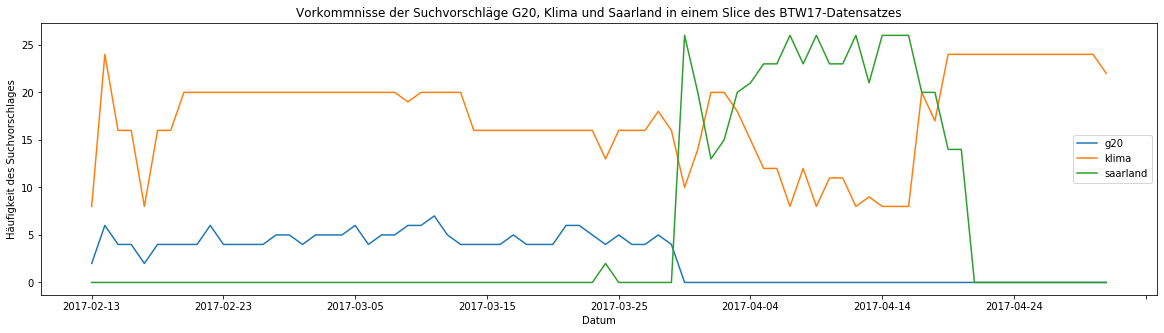

In [7]:
df[['date', 'g20', 'klima', 'saarland']].groupby('date').sum().plot(kind='line', figsize=(20,5),
                                                                    ylabel='Häufigkeit des Suchvorschlages',
                                                                    xlabel='Datum',
                                                                    title='Vorkommnisse der Suchvorschläge G20, Klima und Saarland in einem Slice des BTW17-Datensatzes');

Interessant: Die Landtagswahl im Saarland war am 26. März 2017. Zu diesem Zeitpunkt gehen dort auch die suggestion terms hoch.